## [Edward](http://edwardlib.org/getting-started)

few other resources:  
[1] https://github.com/HIPS/autograd/blob/master/examples/bayesian_neural_net.py

[2] http://twiecki.github.io/blog/2016/06/01/bayesian-deep-learning/

[3] https://github.com/blei-lab/edward/blob/master/examples/getting_started_example.py

#### [4] https://github.com/edwardlib/papers 



### Boilerplate Code

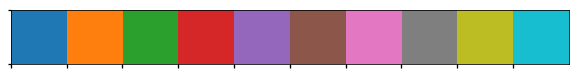

In [10]:
%matplotlib inline
%load_ext watermark
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import edward as ed
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, Normalize
from matplotlib.animation import FuncAnimation
from tempfile import NamedTemporaryFile
from IPython.display import HTML
import seaborn as sns
import numpy as np
import six
import tensorflow as tf

plt.style.use('seaborn-talk')
sns.set_context("talk", font_scale=1.4)
# sns.set_palette("colorblind")
sess = ed.get_session()

sns.palplot(sns.color_palette())
# this can be done only before using Edward
ed.set_seed(42)

### Declare Hyper-Parameters

In [39]:
N = 200  # number of data points
D = 1   # number of features

### Create Data


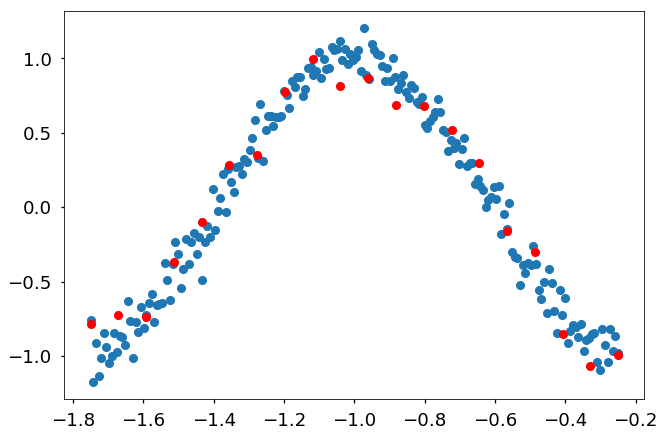

In [40]:
def build_toy_dataset(N=100, noise_std=0.1):
  D = 1
  X = np.linspace(-3, 3, num=N)
  y = np.cos(X) + np.random.normal(0, noise_std, size=N)
  X = X.astype(np.float32)
  X = (X - 4.0) / 4.0
  X = X.reshape((N, D))
  return X, y

X_train, y_train = build_toy_dataset(N)
X_test, y_test = build_toy_dataset(20)
plt.plot(X_train,y_train,"o")
plt.plot(X_test,y_test,"ro")

Next, make inferences about the model from data. We will use variational inference. Specify a normal approximation over the weights and biases.

In [41]:
def neural_network(X):
  h = tf.tanh(tf.matmul(X, W_0) + b_0)
  h = tf.tanh(tf.matmul(h, W_1) + b_1)
  h = tf.matmul(h, W_2) + b_2
  return tf.reshape(h, [-1])


#### Define our Model

In [42]:
from edward.models import Normal
with tf.name_scope("model"):
  W_0 = Normal(loc=tf.zeros([D, 10]), scale=tf.ones([D, 10]), name="W_0")
  W_1 = Normal(loc=tf.zeros([10, 10]), scale=tf.ones([10, 10]), name="W_1")
  W_2 = Normal(loc=tf.zeros([10, 1]), scale=tf.ones([10, 1]), name="W_2")
  b_0 = Normal(loc=tf.zeros(10), scale=tf.ones(10), name="b_0")
  b_1 = Normal(loc=tf.zeros(10), scale=tf.ones(10), name="b_1")
  b_2 = Normal(loc=tf.zeros(1), scale=tf.ones(1), name="b_2")

  X = tf.placeholder(tf.float32, [N, D], name="X")
  y = Normal(loc=neural_network(X), scale=0.1 * tf.ones(N), name="y")

#### Inference

In [ ]:
with tf.name_scope("posterior"):
  with tf.name_scope("qW_0"):
    qW_0 = Normal(loc=tf.Variable(tf.random_normal([D, 10]), name="loc"),
                  scale=tf.nn.softplus(
                      tf.Variable(tf.random_normal([D, 10]), name="scale")))
  with tf.name_scope("qW_1"):
    qW_1 = Normal(loc=tf.Variable(tf.random_normal([10, 10]), name="loc"),
                  scale=tf.nn.softplus(
                      tf.Variable(tf.random_normal([10, 10]), name="scale")))
  with tf.name_scope("qW_2"):
    qW_2 = Normal(loc=tf.Variable(tf.random_normal([10, 1]), name="loc"),
                  scale=tf.nn.softplus(
                      tf.Variable(tf.random_normal([10, 1]), name="scale")))
  with tf.name_scope("qb_0"):
    qb_0 = Normal(loc=tf.Variable(tf.random_normal([10]), name="loc"),
                  scale=tf.nn.softplus(
                      tf.Variable(tf.random_normal([10]), name="scale")))
  with tf.name_scope("qb_1"):
    qb_1 = Normal(loc=tf.Variable(tf.random_normal([10]), name="loc"),
                  scale=tf.nn.softplus(
                      tf.Variable(tf.random_normal([10]), name="scale")))
  with tf.name_scope("qb_2"):
    qb_2 = Normal(loc=tf.Variable(tf.random_normal([1]), name="loc"),
                  scale=tf.nn.softplus(
                      tf.Variable(tf.random_normal([1]), name="scale")))

inference = ed.KLqp({W_0: qW_0, b_0: qb_0,
                     W_1: qW_1, b_1: qb_1,
                     W_2: qW_2, b_2: qb_2}, data={y: y_train})

In [116]:
inference.run(logdir='log')

1000/1000 [100%] ██████████████████████████████ Elapsed: 39s | Loss: 5412.816


In [117]:
y_predict = sess.run(y,{X:X_train})

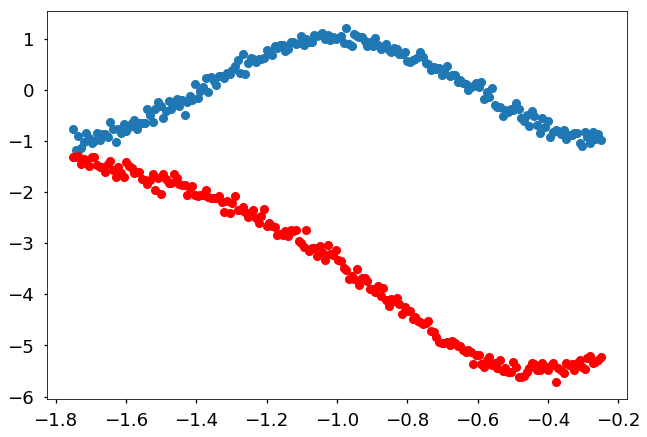

In [118]:
plt.plot(X_train,y_train,"o")
plt.plot(X_train,y_predict,"ro")

In [47]:
%watermark -a "Chinmay Kulkarni" -v -r -m -d

Chinmay Kulkarni 2017-10-25 

CPython 2.7.13
IPython 5.5.0

compiler   : GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)
system     : Darwin
release    : 15.6.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit
Git repo   : https://github.com/chromonav/neuroprobe


In [113]:
inference